# Washington DC Crime Analysis 
### DATA 602: Introduction to Data Analysis and Machine Learning
Authors: Joanne Choi, Sam Clark, Peter Kirk, William Simpson, Levan Sulimanov

Github: [DC Crime Analysis](https://github.com/joannechoi/DC-Crime-Analysis)

### Import libraries

In [ ]:
#!pip install geopandas

In [73]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import openpyxl
from shapely.geometry import Point, Polygon
from pyproj import CRS
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Data & Preprocess Data
Following datasets were used to create the final dataset. The final dataset was exported as csv file before it was used for analysis. The data preprocessing code are commented out to save on computational time. 

In [22]:
# DC crime incidents datasets between 2017-2021 from Open Data DC
#merged = pd.concat(
#    map(pd.read_csv, ['https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2017.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2018.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2019.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2020.csv', 
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2021.csv']), 
#                   ignore_index=True)

# download dataframe into a csv file
#df.to_csv ('MergedData_2017-2021.csv', index = False, header=True)
#files.download("MergedData_2017-2021.csv")

# drop unnecessary columns
#df_crime = merged.drop(['X', 'Y', 'CCN', 'ANC', 'PSA', 'CENSUS_TRACT', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 
#                         'VOTING_PRECINCT', 'BID', 'OBJECTID',	'OCTO_RECORD_ID' ], axis = 1)

# DC Covid Statistics data
#df_covid_ward = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Total Cases by Ward', engine='openpyxl')
#df_covid_death = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Lives Lost by Ward', engine='openpyxl')

# DC Police 
#df_sick_police = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/daily_count_police_out_due_to_covid.csv')

# DC metro station dataset from Open Data DC
#metro = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Metro_Stations_in_DC.csv')

# DC night club dataset from Open Data DC
#nightlife = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Night_Club.csv')

# DC places of worship
# worship = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/places_of_worship.csv')

In [23]:
# cleanse crime incidents 

#del df_crime['REPORT_DAT']
#del df_crime['BLOCK']
#del df_crime['YBLOCK']
#del df_crime['XBLOCK']
#del df_crime['END_DATE']
#del df_crime['METHOD']
#del df_crime['DISTRICT']
#df_crime = df_crime.rename(columns = {'START_DATE':'date'})
#df_crime['date'] = pd.to_datetime(df_crime['date']).dt.date
#df_crime['date'] = pd.to_datetime(df_crime['date'])

# drop records with null records
#df_crime = df_crime.dropna(axis=0)

In [24]:
# cleanse crime incidents 

#df_covid_ward = df_covid_ward.transpose()
#df_covid_ward.reset_index(drop = True, inplace= True)
#df_covid_ward.columns=('date', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'unknown')
#df_covid_ward = df_covid_ward.iloc[1: , :]
#df_covid_ward['date'] = pd.to_datetime(df_covid_ward['date'])
#df_covid_ward['total_cases'] = (df_covid_ward['ward_1'] + df_covid_ward['ward_2'] + df_covid_ward['ward_3'] + df_covid_ward['ward_4'] + df_covid_ward['ward_5'] + df_covid_ward['ward_6'] +df_covid_ward['ward_7'] + df_covid_ward['ward_8'] +df_covid_ward['unknown'])
#df_covid_ward['daily_cases'] = df_covid_ward['total_cases'].diff(1)

#del df_covid_ward['ward_1']
#del df_covid_ward['ward_2']
#del df_covid_ward['ward_3']
#del df_covid_ward['ward_4']
#del df_covid_ward['ward_5']
#del df_covid_ward['ward_6']
#del df_covid_ward['ward_7']
#del df_covid_ward['ward_8']
#del df_covid_ward['unknown']

#df_covid_ward.fillna(0, inplace=True)

In [25]:
# cleanse death data

#df_covid_death = df_covid_death.transpose()
#df_covid_death.reset_index(drop = True, inplace= True)
#df_covid_death.columns=('date', 'all', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'Experienced Homelessness', 'unknown', 'na')
#df_covid_death = df_covid_death.iloc[1: , :]
#df_covid_death['date'] = pd.to_datetime(df_covid_death['date'])
#df_covid_death['daily_death'] = df_covid_death['all'].diff(1)

#del df_covid_death['ward_1']
#del df_covid_death['ward_2']
#del df_covid_death['ward_3']
#del df_covid_death['ward_4']
#del df_covid_death['ward_5']
#del df_covid_death['ward_6']
#del df_covid_death['ward_7']
#del df_covid_death['ward_8']
#del df_covid_death['unknown']
#del df_covid_death['na']
#del df_covid_death['Experienced Homelessness']
#del df_covid_death['all']

#df_covid_death.fillna(0, inplace=True)

In [26]:
# cleanse sick police

#df_sick_police = df_sick_police.rename(columns = {'DATE_REPORTED':'date'})
#df_sick_police['date'] = pd.to_datetime(df_sick_police['date'])

#df_sick_police.fillna(0, inplace=True)

In [27]:
# merge the dataframes together
#merged = df_crime.merge(df_covid_ward, how='left', on = 'date').merge(df_covid_death, how='left', on = 'date').merge(df_sick_police, how='left', on = 'date')

# create dummy data

# getting weekday dummies
#merged['weekday'] = merged['date'].dt.dayofweek
#dummy0 = pd.get_dummies(merged['weekday'])
#dummy0.columns = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']
#merged = pd.concat([merged, dummy0] , axis = 1)
#del merged['weekday']

# get month dummies
#merged['month'] = merged['date'].dt.month
#dummy1 = pd.get_dummies(merged['month'])
#dummy1.columns = ['JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']              
#merged = pd.concat([merged, dummy1] , axis = 1)
#del merged['month']

# ward dummies
#dummy2 = pd.get_dummies(merged['WARD'])
#dummy2.columns = ['ward_1', 'ward_2','ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8']              
#merged = pd.concat([merged, dummy2] , axis = 1)

# offense dummies
#dummy3 = pd.get_dummies(merged['OFFENSE'])
#merged = pd.concat([merged, dummy3] , axis = 1)

# shift dummies
#dummies4 = pd.get_dummies(merged.SHIFT)
#merged = pd.concat([merged, dummies4], axis=1)

# replace nan with 0
#merged.fillna(0, inplace=True)

In [28]:
# creating new column for tuple of x and y coordinates
#merged['coords'] = tuple(zip(merged.LONGITUDE, merged.LATITUDE))
#metro['coords2'] = tuple(zip(metro.X, metro.Y))

In [29]:
# join place of worship distance into crime data

#df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
#del df_metro_nightclub_worship['index']

In [30]:
# calculate the distance between each crime incident to the closest metro stations

#distance_metro = []
#for index, row in merged.iterrows():
#    for index2, row2 in metro.iterrows():
#        x = geodesic(row['coords'], row2['coords2']).miles
#        z = [index, index2, x]
#        distance_metro.append(z)
#df = pd.DataFrame(distance_metro, columns = ['index', 'metro_stop_id', 'distance_metro'])
#df2 = df.groupby(['index'], as_index=False).agg({'distance_metro':'min'})

# merge metro distance from metro to main dataset

#df3 = pd.concat([merged, df2], axis=1)
#del df3['coords']
#del df3['index']

# calculate the distance between each crime incident to the closest nightlife location

#nightlife['coords3'] = tuple(zip(nightlife.LONGITUDE, nightlife.LATITUDE))
#distance_nightclubs = []
#for index, row in merged.iterrows():
#    for index2, row2 in nightlife.iterrows():
#        x = geodesic(row['coords'], row2['coords3']).miles
#        z = [index, index2, x]
#        distance_nightclubs.append(z)
#df = pd.DataFrame(distance_nightclubs, columns = ['index', 'nightclub_id', 'distance_nightclubs'])
#df_clubs = df.groupby(['index'], as_index=False).agg({'distance_nightclubs':'min'})

# merge nightclub distance from metro to main dataset

#df_metro_nightclub = pd.concat([df3, df_clubs], axis=1)
#del df_metro_nightclub['index']

# calculate the distance between each crime incident to the closest place of worship location

#worship['coords4'] = tuple(zip(worship.long, worship.lat))
#distance_worship = []
#for index, row in merged.iterrows():
#    for index2, row2 in worship.iterrows():
#        x = geodesic(row['coords'], row2['coords4']).miles
#        z = [index, index2, x]
#        distance_worship.append(z)
#df = pd.DataFrame(distance_worship, columns = ['index', 'worship_id', 'distance_worship'])
#df_worship = df.groupby(['index'], as_index=False).agg({'distance_worship':'min'})

# merge place of worship distance from metro to main dataset

#df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
#del df_metro_nightclub_worship['index']

In [31]:
# split data into covid not covid

#covid_start_date = pd.to_datetime("2020-03-11").date()
#df_metro_nightclub_worship['date'] = pd.to_datetime(df_metro_nightclub_worship['date']).dt.date

#pre_covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] <= covid_start_date)]
#covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] > covid_start_date)] 

In [32]:
# export the dataframes to csv files

#pre_covid_time.to_csv(os.path.join(data_dir, 'precovid_crime_micro_geo_11_29_2021.csv'))
#covid_time.to_csv(os.path.join(data_dir, 'covid_crime_micro_geo_11_29_2021.csv'))

#### Import in the final dataset 

In [33]:
# import overall crime data
merged = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/MergedData_2017-2021.csv')

# import Pre-Covid and Covid datasets
precovid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/precovid_crime_micro_geo_11_29_2021.csv', index_col=False)
covid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/covid_crime_micro_geo_11_29_2021.csv', index_col=False)

In [34]:
# shape datasets for crime hotspot analysis
border_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Washington_DC_Boundary.shp')
street_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Roads.shp')

In [35]:
# preview of the precovid data
precovid.sample(5)

Unnamed: 0     SHIFT              OFFENSE  WARD   LATITUDE  LONGITUDE  \
29216        29216  MIDNIGHT  MOTOR VEHICLE THEFT   6.0  38.874652 -77.014438   
102664      119379  MIDNIGHT          THEFT/OTHER   2.0  38.895465 -77.022963   
71012        71012       DAY  MOTOR VEHICLE THEFT   6.0  38.903125 -77.013950   
73505        73505   EVENING         THEFT F/AUTO   2.0  38.907909 -77.023966   
49049        49049       DAY              ROBBERY   8.0  38.857445 -76.995781   

              date  total_cases  daily_cases  daily_death  \
29216   2017-10-24          0.0          0.0          0.0   
102664  2020-02-26          0.0          0.0          0.0   
71012   2019-07-08          0.0          0.0          0.0   
73505   2019-05-14          0.0          0.0          0.0   
49049   2018-11-30          0.0          0.0          0.0   

        OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
29216                             0.0   0   1   0   0   0   0   0    0    0   
102664                            0.0   0   0   1   0   0   0   0    0    1   
71012                             0.0   1   0   0   0   0   0   0    0    0   
73505                             0.0   0   1   0   0   0   0   0    0    0   
49049                             0.0   0   0   0   0   1   0   0    0    0   

        MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ward_1  ward_2  \
29216     0    0    0    0    0    0    0    1    0    0       0       0   
102664    0    0    0    0    0    0    0    0    0    0       0       1   
71012     0    0    0    0    1    0    0    0    0    0       0       0   
73505     0    0    1    0    0    0    0    0    0    0       0       1   
49049     0    0    0    0    0    0    0    0    1    0       0       0   

        ward_3  ward_4  ward_5  ward_6  ward_7  ward_8  ARSON  \
29216        0       0       0       1       0       0      0   
102664       0       0       0       0       0       0      0   
71012        0       0       0       1       0       0      0   
73505        0       0       0       0       0       0      0   
49049        0       0       0       0       0       1      0   

        ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
29216                            0         0         0                    1   
102664                           0         0         0                    0   
71012                            0         0         0                    1   
73505                            0         0         0                    0   
49049                            0         0         0                    0   

        ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
29216         0          0             0            0    0        0         1   
102664        0          0             0            1    0        0         1   
71012         0          0             0            0    1        0         0   
73505         0          0             1            0    0        1         0   
49049         1          0             0            0    1        0         0   

        distance_metro  distance_nightclubs  distance_worship  
29216         0.190557             0.307731          0.029773  
102664        0.077741             0.119911          0.064348  
71012         0.216486             0.329958          0.036111  
73505         0.144007             0.138318          0.021424  
49049         0.090797             0.164465          0.058476

In [36]:
# preview of the covid data
covid.sample(5)

Unnamed: 0     SHIFT              OFFENSE  WARD   LATITUDE  LONGITUDE  \
22510      126856  MIDNIGHT          THEFT/OTHER   8.0  38.832479 -77.008258   
28993      133344  MIDNIGHT  MOTOR VEHICLE THEFT   2.0  38.897343 -77.020917   
30582      134933       DAY         THEFT F/AUTO   6.0  38.906841 -77.005885   
6654       108172       DAY          THEFT/OTHER   2.0  38.904238 -77.040299   
36943      141298   EVENING          THEFT/OTHER   7.0  38.881844 -76.942482   

             date  total_cases  daily_cases  daily_death  \
22510  2021-01-29      36662.0        248.0          2.0   
28993  2021-05-14      48530.0        106.0          2.0   
30582  2021-05-16      48590.0         75.0          2.0   
6654   2020-06-12       9709.0         55.0          5.0   
36943  2021-08-03      50858.0         58.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
22510                            0.0   0   0   0   0   1   0   0    1    0   
28993                           11.0   0   0   0   0   1   0   0    0    0   
30582                           11.0   0   0   0   0   0   0   1    0    0   
6654                            43.0   0   0   0   0   1   0   0    0    0   
36943                           36.0   0   1   0   0   0   0   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ward_1  ward_2  \
22510    0    0    0    0    0    0    0    0    0    0       0       0   
28993    0    0    1    0    0    0    0    0    0    0       0       1   
30582    0    0    1    0    0    0    0    0    0    0       0       0   
6654     0    0    0    1    0    0    0    0    0    0       0       1   
36943    0    0    0    0    0    1    0    0    0    0       0       0   

       ward_3  ward_4  ward_5  ward_6  ward_7  ward_8  ARSON  \
22510       0       0       0       0       0       1      0   
28993       0       0       0       0       0       0      0   
30582       0       0       0       1       0       0      0   
6654        0       0       0       0       0       0      0   
36943       0       0       0       0       1       0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
22510                           0         0         0                    0   
28993                           0         0         0                    1   
30582                           0         0         0                    0   
6654                            0         0         0                    0   
36943                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
22510        0          0             0            1    0        0         1   
28993        0          0             0            0    0        0         1   
30582        0          0             1            0    1        0         0   
6654         0          0             0            1    1        0         0   
36943        0          0             0            1    0        1         0   

       distance_metro  distance_nightclubs  distance_worship  
22510        0.720986             0.564072          0.037016  
28993        0.071096             0.171709          0.054844  
30582        0.176900             0.205436          0.179038  
6654         0.044292             0.033949          0.011852  
36943        0.319401             2.148693          0.036989

### Exploratory Data Analysis

Crime count by type before Covid-19
------------------------------------
THEFT/OTHER                   46060
THEFT F/AUTO                  33638
MOTOR VEHICLE THEFT            7247
ROBBERY                        6560
ASSAULT W/DANGEROUS WEAPON     5193
BURGLARY                       4368
SEX ABUSE                       801
HOMICIDE                        472
ARSON                            20
Name: OFFENSE, dtype: int64


Crime count by type during Covid-19
------------------------------------
THEFT/OTHER                   16367
THEFT F/AUTO                  12809
MOTOR VEHICLE THEFT            5552
ROBBERY                        3168
ASSAULT W/DANGEROUS WEAPON     2636
BURGLARY                       2026
HOMICIDE                        332
SEX ABUSE                       261
ARSON                            13
Name: OFFENSE, dtype: int64


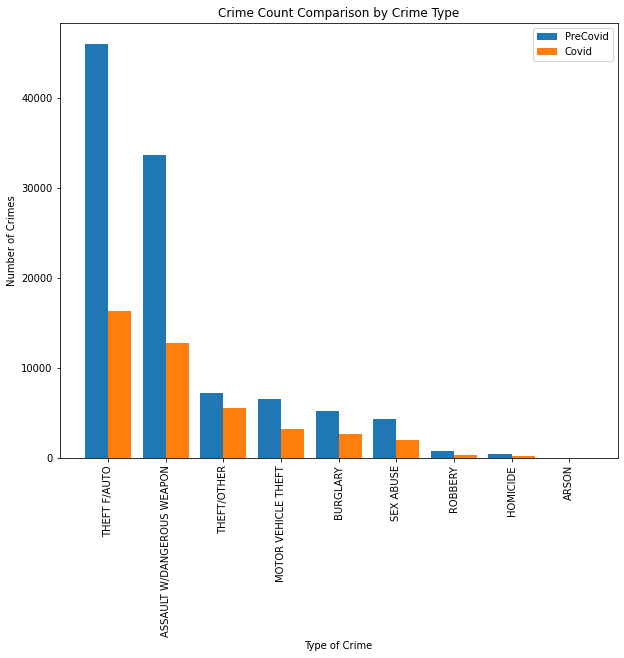

In [19]:
crimeTypes = precovid["OFFENSE"].unique()
precovid_types = precovid['OFFENSE'].value_counts()
covid_types = covid['OFFENSE'].value_counts()

print("Crime count by type before Covid-19")
print("------------------------------------")
print(precovid_types)
print('\n')
print("Crime count by type during Covid-19")
print("------------------------------------")
print(covid_types)

plt.figure(figsize=(10, 8))

x = np.arange(len(crimeTypes))
plt.bar(x - 0.2, precovid_types, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_types, 0.4, label = 'Covid')

plt.xticks(x, crimeTypes, rotation = 90)
plt.xlabel("Type of Crime")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Crime Type")
plt.legend()
plt.show()

Crime count by ward before Covid-19
------------------------------------
1.0    14776
2.0    19413
3.0     5908
4.0     9567
5.0    16016
6.0    16683
7.0    12540
8.0     9456
Name: WARD, dtype: int64


Crime count by ward during Covid-19
------------------------------------
1.0    5998
2.0    6712
3.0    2301
4.0    4101
5.0    6779
6.0    7683
7.0    5417
8.0    4173
Name: WARD, dtype: int64


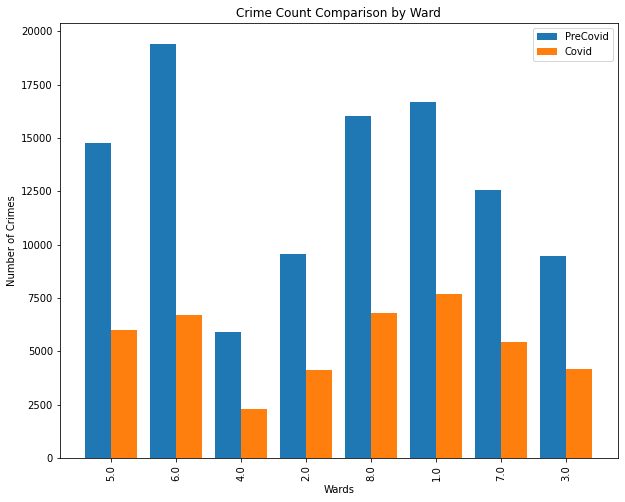

In [20]:
# view crime count by ward before and during covid
wards = precovid["WARD"].unique()
#x_wards = wards.sort()
precovid_wards = precovid['WARD'].value_counts().sort_index()
covid_wards = covid['WARD'].value_counts().sort_index()

print("Crime count by ward before Covid-19")
print("------------------------------------")
print(precovid_wards)
print('\n')
print("Crime count by ward during Covid-19")
print("------------------------------------")
print(covid_wards)

plt.figure(figsize=(10, 8))

x=np.arange(len(wards))
plt.bar(x - 0.2, precovid_wards, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_wards, 0.4, label = 'Covid')

plt.xticks(x, wards, rotation = 90)
plt.xlabel("Wards")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Ward")
plt.legend()
plt.show()

#### Crime Hotspot Analysis 

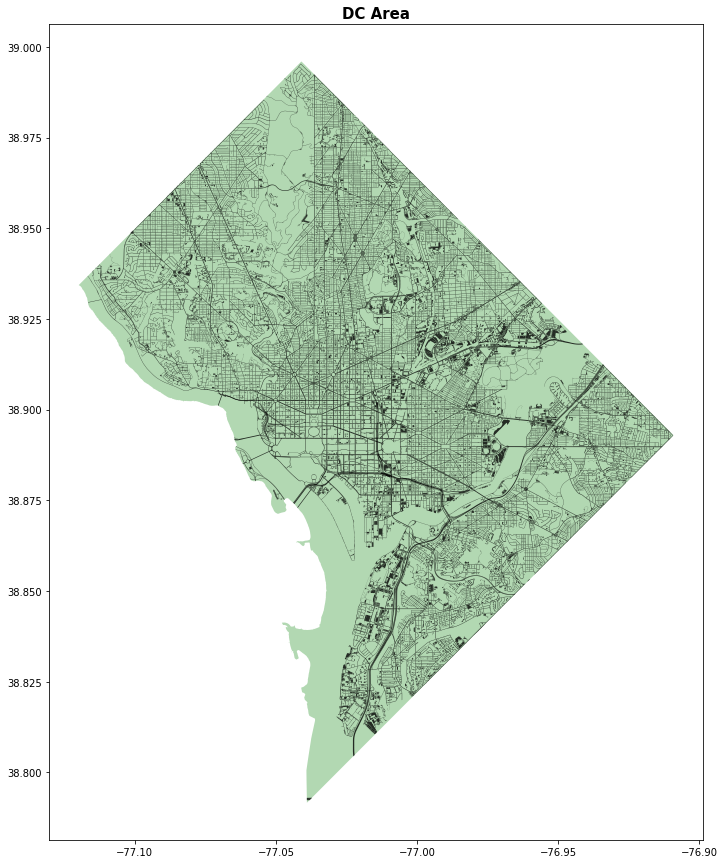

In [37]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.3, color='green')
street_map.plot(ax=ax, alpha=0.8, color='black')
# add title to graph
plt.title('DC Area', fontsize=15,fontweight='bold')
plt.show()

##### Process data for the crime hotspots

In [38]:
# sort and split by date
# convert each of the dates into datetime format:
merged['REPORT_DAT'] = pd.to_datetime(merged['REPORT_DAT'])
merged['START_DATE'] = pd.to_datetime(merged['START_DATE'])
merged['END_DATE'] = pd.to_datetime(merged['END_DATE'])

# store the sorted results into a new dataframe:
df_date_sorted = copy.deepcopy(merged)
df_date_sorted = df_date_sorted.set_index(df_date_sorted['START_DATE'])
df_date_sorted = df_date_sorted.sort_index()

View crime trends throughout the years

Text(0.5, 1.0, 'Year - 2017')

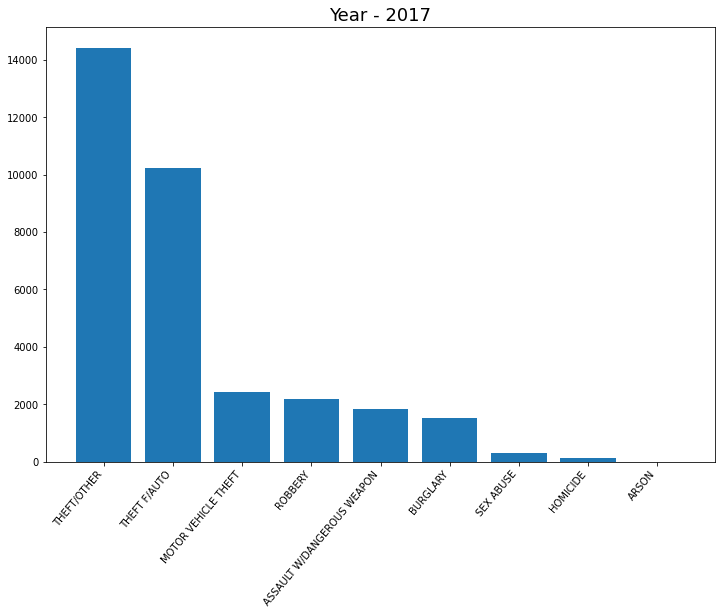

In [39]:
df_date_sorted_2017 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2017])
df_date_sorted_2017 = df_date_sorted_2017.set_index(df_date_sorted_2017['START_DATE'])
df_date_sorted_2017 = df_date_sorted_2017.sort_index()

classes_count_2017 = df_date_sorted_2017['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2017)), list(classes_count_2017.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2017.keys())))
ax.set_xticklabels(labels=list(classes_count_2017.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2017", fontsize=18)

Text(0.5, 1.0, 'Year - 2018')

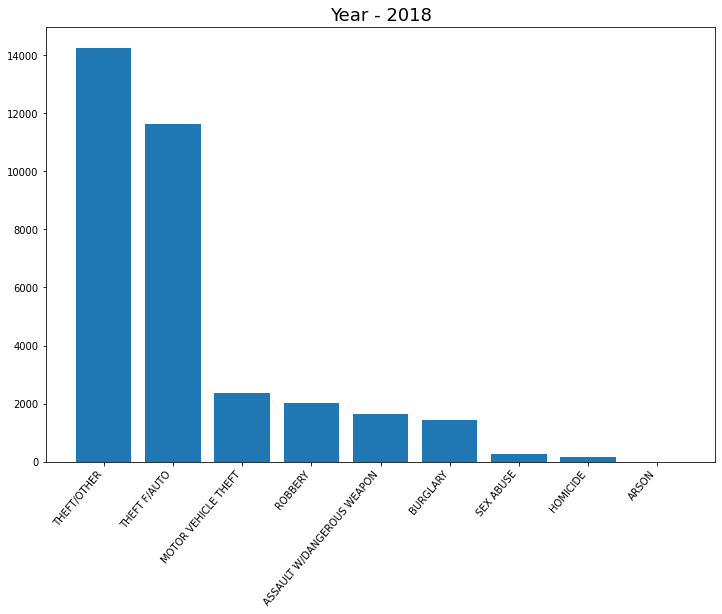

In [40]:
df_date_sorted_2018 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2018])
df_date_sorted_2018 = df_date_sorted_2018.set_index(df_date_sorted_2018['START_DATE']) #.dt.strftime('%Y-%m-%d')) # should it be END_DATE or what?
df_date_sorted_2018 = df_date_sorted_2018.sort_index()

classes_count_2018 = df_date_sorted_2018['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2018)), list(classes_count_2018.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2018.keys())))
ax.set_xticklabels(labels=list(classes_count_2018.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2018", fontsize=18)

Text(0.5, 1.0, 'Year - 2019')

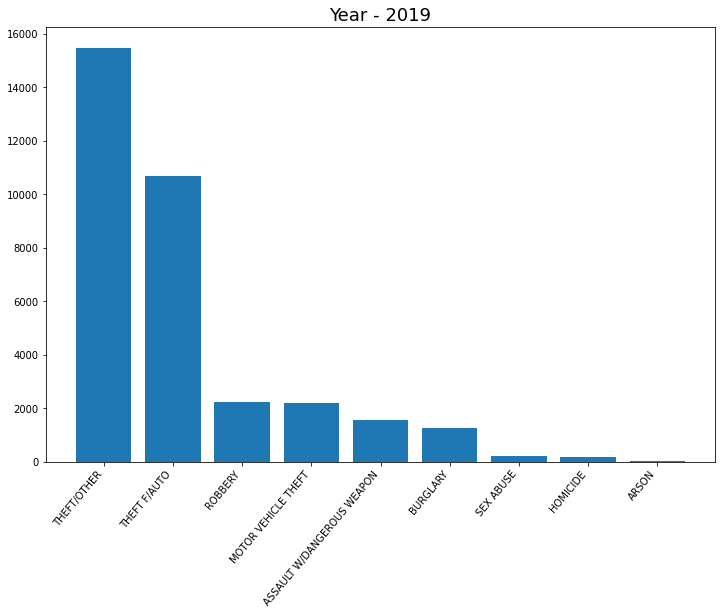

In [41]:
df_date_sorted_2019 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2019])
df_date_sorted_2019 = df_date_sorted_2019.set_index(df_date_sorted_2019['START_DATE']) #.dt.strftime('%Y-%m-%d')) # should it be END_DATE or what?
df_date_sorted_2019 = df_date_sorted_2019.sort_index()

classes_count_2019 = df_date_sorted_2019['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2019)), list(classes_count_2019.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2019.keys())))
ax.set_xticklabels(labels=list(classes_count_2019.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2019", fontsize=18)

Text(0.5, 1.0, 'Year - 2020')

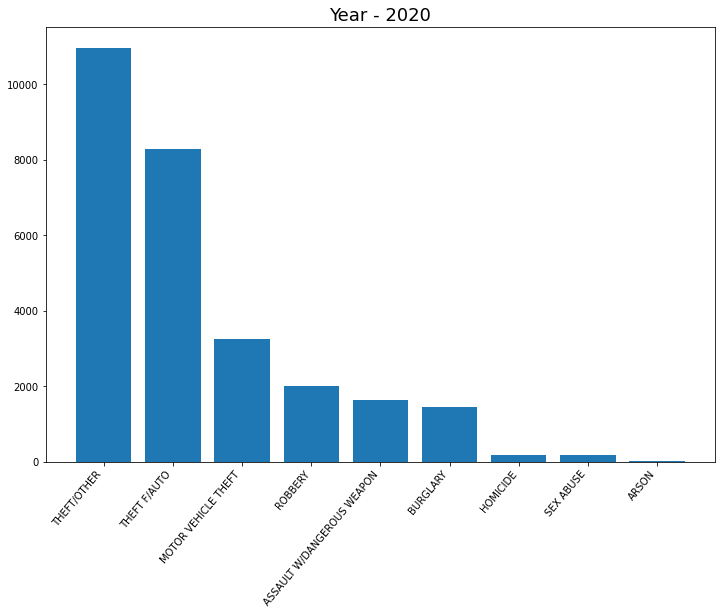

In [42]:
df_date_sorted_2020 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2020])
df_date_sorted_2020 = df_date_sorted_2020.set_index(df_date_sorted_2020['START_DATE']) #.dt.strftime('%Y-%m-%d')) # should it be END_DATE or what?
df_date_sorted_2020 = df_date_sorted_2020.sort_index()

classes_count_2020 = df_date_sorted_2020['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2020)), list(classes_count_2020.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2020.keys())))
ax.set_xticklabels(labels=list(classes_count_2020.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2020", fontsize=18)

Text(0.5, 1.0, 'Year - 2021')

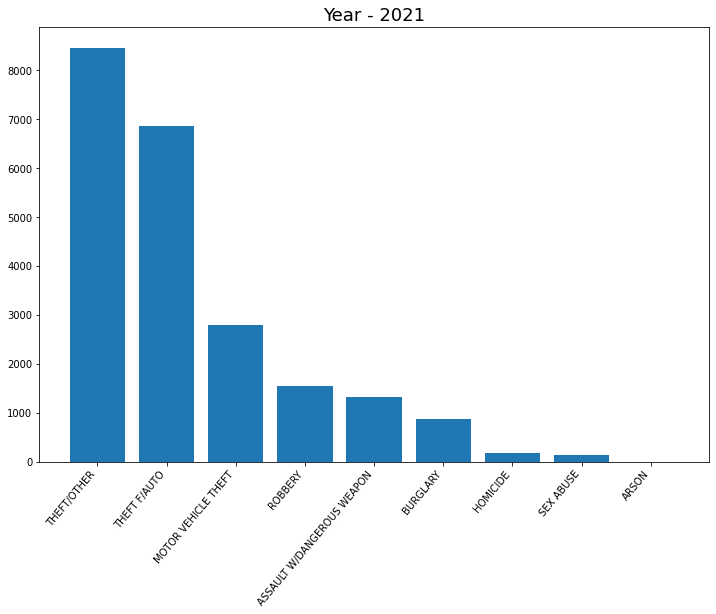

In [43]:
df_date_sorted_2021 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2021])
df_date_sorted_2021 = df_date_sorted_2021.set_index(df_date_sorted_2021['START_DATE']) #.dt.strftime('%Y-%m-%d')) # should it be END_DATE or what?
df_date_sorted_2021 = df_date_sorted_2021.sort_index()

classes_count_2021 = df_date_sorted_2021['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2021)), list(classes_count_2021.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2021.keys())))
ax.set_xticklabels(labels=list(classes_count_2021.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2021", fontsize=18)

GeoPandas dataframe setup for annual hotspot

In [44]:
crs=CRS('EPSG:4326')
geo_precovid = precovid.copy()
geo_covid = covid.copy()

geometry_pre_covid_2017 = [Point(xy) for xy in zip(df_date_sorted_2017['LONGITUDE'], df_date_sorted_2017['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2017 = gpd.GeoDataFrame(df_date_sorted_2017,
 crs = crs,
 geometry = geometry_pre_covid_2017)

geometry_pre_covid_2018 = [Point(xy) for xy in zip(df_date_sorted_2018['LONGITUDE'], df_date_sorted_2018['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2018 = gpd.GeoDataFrame(df_date_sorted_2018,
 crs = crs,
 geometry = geometry_pre_covid_2018)

geometry_pre_covid_2019 = [Point(xy) for xy in zip(df_date_sorted_2019['LONGITUDE'], df_date_sorted_2019['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2019 = gpd.GeoDataFrame(df_date_sorted_2019,
 crs = crs,
 geometry = geometry_pre_covid_2019)


geometry_post_covid_2020 = [Point(xy) for xy in zip(df_date_sorted_2020['LONGITUDE'], df_date_sorted_2020['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2020 = gpd.GeoDataFrame(df_date_sorted_2020,
 crs = crs,
 geometry = geometry_post_covid_2020)

geometry_post_covid_2021 = [Point(xy) for xy in zip(df_date_sorted_2021['LONGITUDE'], df_date_sorted_2021['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2021 = gpd.GeoDataFrame(df_date_sorted_2021,
 crs = crs,
 geometry = geometry_post_covid_2021)

#####DC Crime Hotspot - 2017

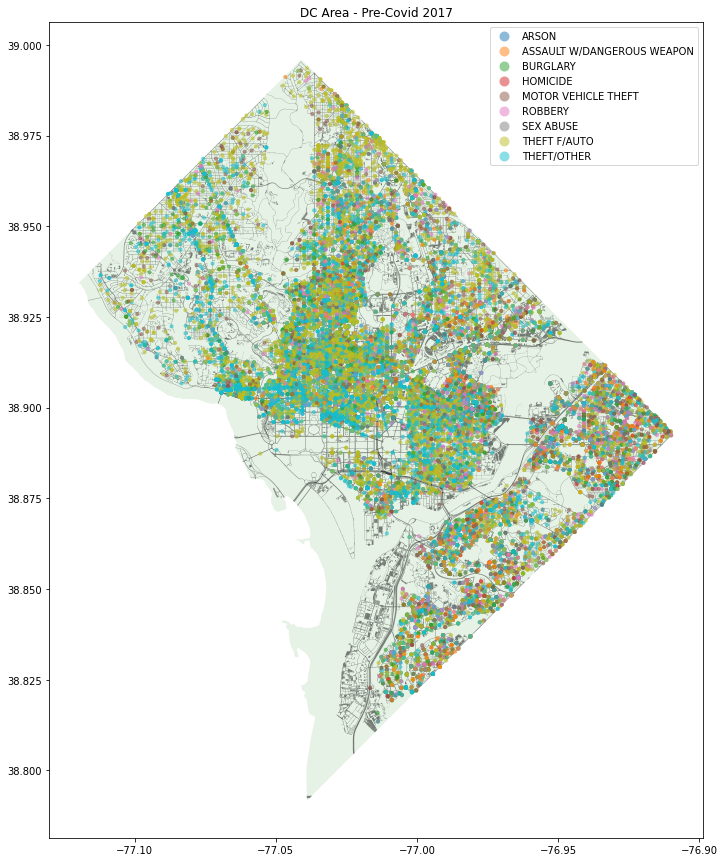

In [45]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2017.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2017')

#####DC Crime Hotspot - 2018



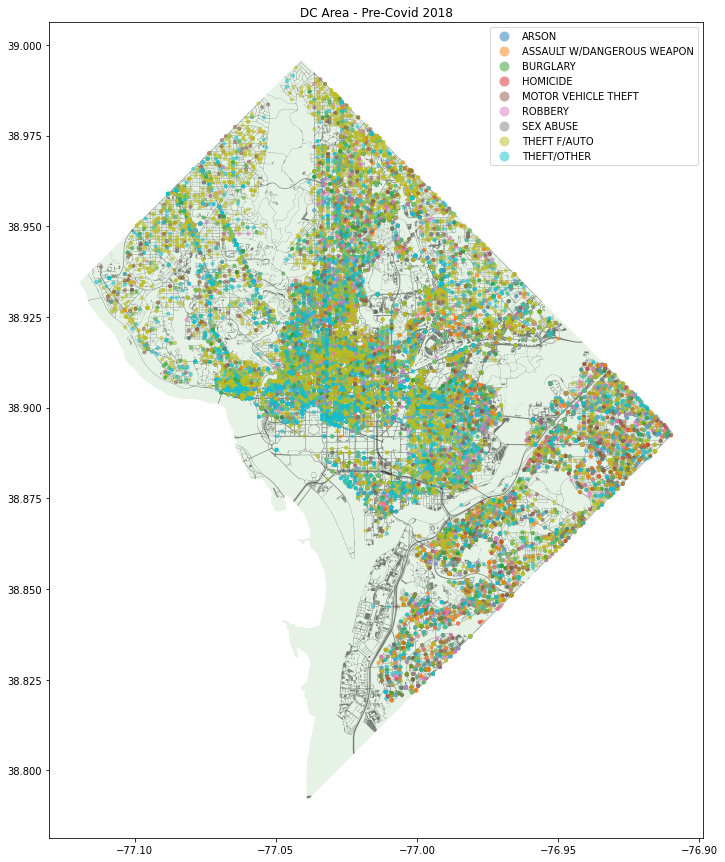

In [46]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2018.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2018')

#####DC Crime Hotspot - 2019


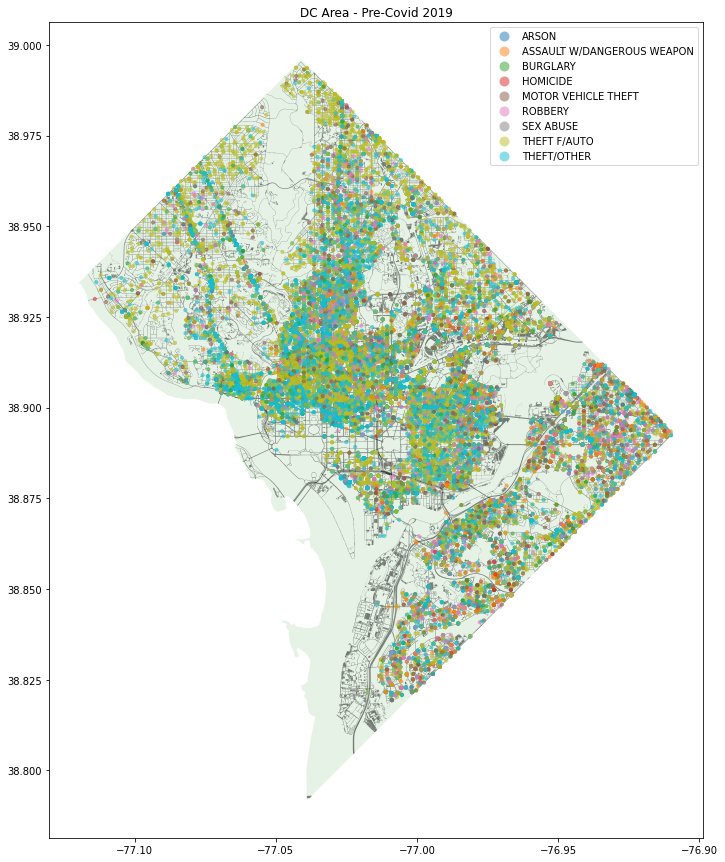

In [47]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2019.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2019')

##### DC Crime Hotspot - 2020

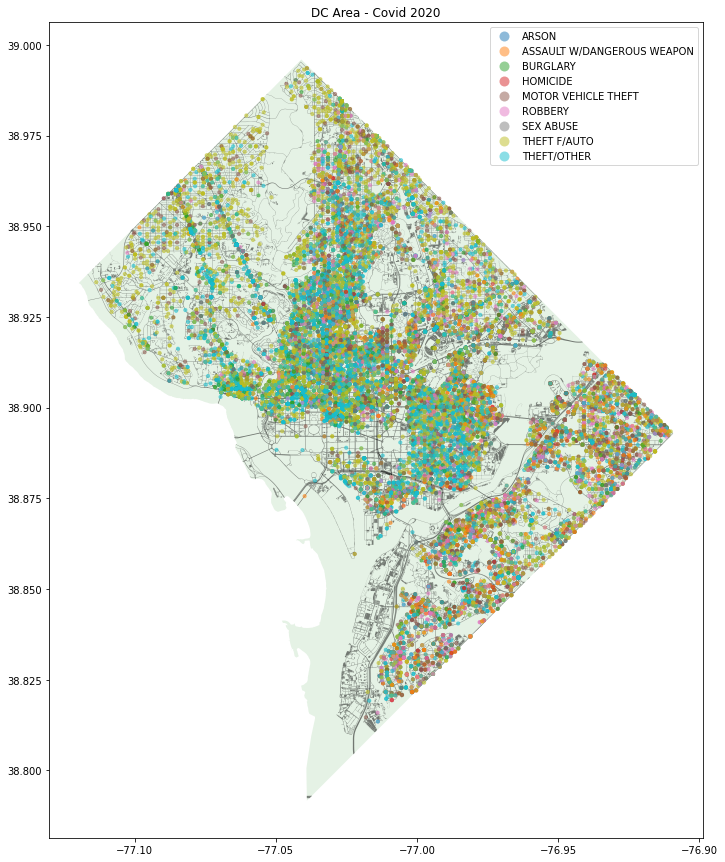

In [48]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2020.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2020')

##### DC Crime Hotspot - 2021

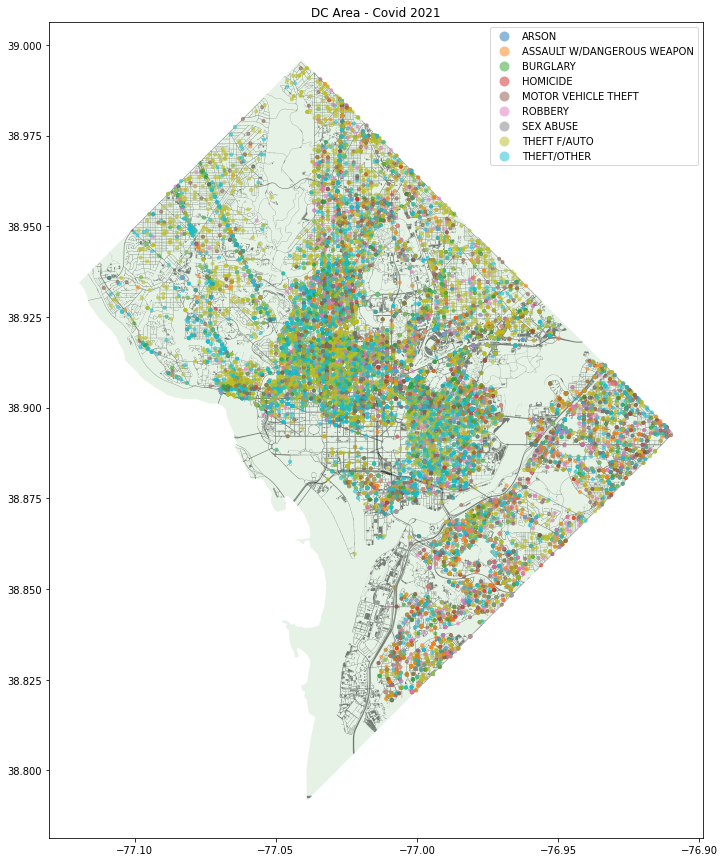

In [49]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2021.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2021')

##### Plot accumulative hotspot for Pre-Covid and Covid timeframes

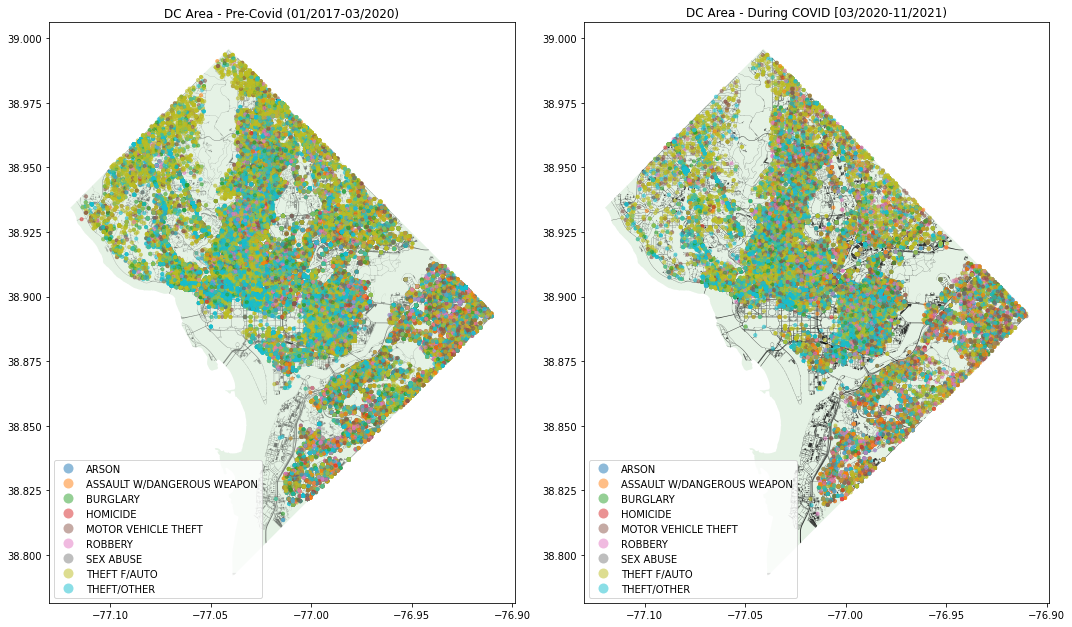

In [55]:
geometry_pre_covid = [Point(xy) for xy in zip(geo_precovid['LONGITUDE'], geo_precovid['LATITUDE'])]
geo_df_pre_covid = gpd.GeoDataFrame(geo_precovid, crs = crs, geometry = geometry_pre_covid)

geometry_post_covid = [Point(xy) for xy in zip(geo_covid['LONGITUDE'], geo_covid['LATITUDE'])]
geo_df_post_covid = gpd.GeoDataFrame(geo_covid, crs = crs, geometry = geometry_post_covid)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# add .shp mapfile to axes
border_map.plot(ax=ax[0], alpha=0.1, color='green')
street_map.plot(ax=ax[0], alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid.plot(column='OFFENSE',ax=ax[0],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[0].title.set_text('DC Area - Pre-Covid (01/2017-03/2020)')

# add .shp mapfile to axes
border_map.plot(ax=ax[1], alpha=0.1, color='green')
street_map.plot(ax=ax[1], alpha=0.8, color='black')
# overlay samples
geo_df_post_covid.plot(column='OFFENSE',ax=ax[1],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[1].title.set_text('DC Area - During COVID [03/2020-11/2021)')

fig.tight_layout()

### Data Processing for Model Training

In [57]:
pre_covid_data = precovid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])
covid_data = covid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])

pre_covid_data['WARD'] = pre_covid_data['WARD'].astype(int)
covid_data['WARD'] = covid_data['WARD'].astype(int)

In [58]:
pre_covid_data.sample(3)

WARD        date  total_cases  daily_cases  daily_death  \
54455     1  2018-09-19          0.0          0.0          0.0   
58307     8  2018-09-16          0.0          0.0          0.0   
61833     2  2018-07-09          0.0          0.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
54455                            0.0   0   0   1   0   0   0   0    0    0   
58307                            0.0   0   0   0   0   0   0   1    0    0   
61833                            0.0   1   0   0   0   0   0   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
54455    0    0    0    0    0    0    1    0    0    0      0   
58307    0    0    0    0    0    0    1    0    0    0      0   
61833    0    0    0    0    1    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
54455                           0         0         0                    0   
58307                           1         0         0                    0   
61833                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
54455        0          0             1            0    0        1         0   
58307        0          0             0            0    0        1         0   
61833        0          0             0            1    0        1         0   

       distance_metro  distance_nightclubs  distance_worship  
54455        0.167003             0.097138          0.044787  
58307        0.193543             0.322012          0.042651  
61833        0.041858             0.046487          0.034470

In [59]:
covid_data.sample(3)

WARD        date  total_cases  daily_cases  daily_death  \
13193     4  2020-12-06      23319.0        183.0          4.0   
15630     6  2020-10-26      16906.0         94.0          2.0   
29649     4  2021-08-08          0.0          0.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
13193                          135.0   0   0   0   0   0   0   1    0    0   
15630                           71.0   1   0   0   0   0   0   0    0    0   
29649                           36.0   0   0   0   0   0   0   1    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
13193    0    0    0    0    0    0    0    0    0    1      0   
15630    0    0    0    0    0    0    0    1    0    0      0   
29649    0    0    0    0    0    1    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
13193                           0         0         0                    0   
15630                           0         0         0                    0   
29649                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
13193        0          0             1            0    1        0         0   
15630        0          0             1            0    1        0         0   
29649        1          0             0            0    0        0         1   

       distance_metro  distance_nightclubs  distance_worship  
13193        0.440359             0.295094          0.101252  
15630        0.229824             0.360878          0.051530  
29649        0.356099             0.492408          0.027542

In [60]:
# Baseline:
x_PRE_COVID_baseline_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_baseline_not_scaled["total_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_death"]
del x_PRE_COVID_baseline_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_baseline_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Experiment:
x_PRE_COVID_experiment_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_experiment_not_scaled["total_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_death"]
del x_PRE_COVID_experiment_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_experiment_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Labels:
y_PRE_COVID_base = pre_covid_data['WARD']
y_COVID_base = covid_data['WARD']

y_PRE_COVID_experiment = covid_data['WARD']
y_COVID_experiment = pre_covid_data['WARD']

In [61]:
x_PRE_COVID_baseline_not_scaled.sample(3)

date  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  MAR  APR  MAY  JUN  \
76213  2019-09-10   0   1   0   0   0   0   0    0    0    0    0    0    0   
77788  2019-09-24   0   1   0   0   0   0   0    0    0    0    0    0    0   
47490  2018-10-09   0   1   0   0   0   0   0    0    0    0    0    0    0   

       JUL  AUG  SEP  OCT  NOV  DEC  ARSON  ASSAULT W/DANGEROUS WEAPON  \
76213    0    0    1    0    0    0      0                           1   
77788    0    0    1    0    0    0      0                           0   
47490    0    0    0    1    0    0      0                           0   

       BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  ROBBERY  SEX ABUSE  \
76213         0         0                    0        0          0   
77788         0         0                    0        0          0   
47490         0         0                    0        0          0   

       THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  distance_metro  \
76213             0            0    0        0         1        0.114012   
77788             0            1    0        1         0        0.653702   
47490             0            1    0        1         0        0.535372   

       distance_nightclubs  distance_worship  
76213             0.194553          0.127505  
77788             0.419660          0.062241  
47490             1.342877          0.408259

In [62]:
x_COVID_baseline_not_scaled.sample(3)

date  total_cases  daily_cases  daily_death  \
32993  2021-09-16      58851.0        202.0          0.0   
12746  2020-08-09      12807.0         54.0          0.0   
19113  2020-07-12      10906.0         59.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
32993                           52.0   0   0   0   1   0   0   0    0    0   
12746                          122.0   0   0   0   0   0   0   1    0    0   
19113                           97.0   0   0   0   0   0   0   1    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
32993    0    0    0    0    0    0    1    0    0    0      0   
12746    0    0    0    0    0    1    0    0    0    0      0   
19113    0    0    0    0    1    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
32993                           0         0         0                    0   
12746                           0         0         0                    0   
19113                           0         0         0                    1   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
32993        0          0             0            1    1        0         0   
12746        0          0             0            1    1        0         0   
19113        0          0             0            0    1        0         0   

       distance_metro  distance_nightclubs  distance_worship  
32993        0.087151             0.323807          0.083539  
12746        0.086162             0.132756          0.047516  
19113        0.071868             0.719182          0.073276

In [63]:
x_PRE_COVID_experiment_not_scaled.sample(3)

date  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  MAR  APR  MAY  JUN  \
23985  2021-01-12   0   1   0   0   0   0   0    1    0    0    0    0    0   
14530  2020-11-15   0   0   0   0   0   0   1    0    0    0    0    0    0   
1904   2020-10-28   0   0   1   0   0   0   0    0    0    0    0    0    0   

       JUL  AUG  SEP  OCT  NOV  DEC  ARSON  ASSAULT W/DANGEROUS WEAPON  \
23985    0    0    0    0    0    0      0                           0   
14530    0    0    0    0    1    0      0                           0   
1904     0    0    0    1    0    0      0                           0   

       BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  ROBBERY  SEX ABUSE  \
23985         0         0                    0        0          0   
14530         0         0                    0        1          0   
1904          0         0                    0        0          0   

       THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  distance_metro  \
23985             1            0    0        1         0        0.160538   
14530             0            0    0        1         0        0.399319   
1904              0            1    1        0         0        0.170769   

       distance_nightclubs  distance_worship  
23985             0.320089          0.070522  
14530             0.411639          0.038041  
1904              0.934444          0.136087

In [64]:
x_COVID_experiment_not_scaled.sample(3)

date  total_cases  daily_cases  daily_death  \
41484  2018-05-03          0.0          0.0          0.0   
7700   2017-05-26          0.0          0.0          0.0   
85986  2019-12-12          0.0          0.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
41484                            0.0   0   0   0   1   0   0   0    0    0   
7700                             0.0   0   0   0   0   1   0   0    0    0   
85986                            0.0   0   0   0   1   0   0   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
41484    0    0    1    0    0    0    0    0    0    0      0   
7700     0    0    1    0    0    0    0    0    0    0      0   
85986    0    0    0    0    0    0    0    0    0    1      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
41484                           0         0         0                    0   
7700                            0         0         0                    0   
85986                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
41484        1          0             0            0    0        0         1   
7700         0          0             0            1    0        1         0   
85986        0          0             1            0    0        1         0   

       distance_metro  distance_nightclubs  distance_worship  
41484        0.385363             2.717108          0.050439  
7700         0.311487             0.426395          0.040930  
85986        0.232622             0.736653          0.035868

In [65]:
del x_PRE_COVID_baseline_not_scaled['date']
del x_COVID_baseline_not_scaled['date']
del x_PRE_COVID_experiment_not_scaled['date']
del x_COVID_experiment_not_scaled['date']

### ML Algorithms


1.   Logistic Regression
2.   Decision Tree
2.   Random Forest
3.   Gradient Boost
4.   KNN
5.   SVC

#### Function that splits the dataset with 5 different random seeds and trains each model. Once the models are trained, accuracy, precision and recall values are returned. 

In [74]:
def cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, x_COVID_baseline_not_scaled, y_COVID_base, 
                     x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, x_COVID_experiment_not_scaled, y_COVID_experiment,
                     precovid_model, covid_model):   
  # get original data
  random_state = [1, 10, 25, 40, 50]

  ###################
  cross_val_score_lst_PRE_COVID_MODEL_base = []
  pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  cross_val_score_lst_COVID_MODEL_base = []
  pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  ###################
  cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
  pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

  cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
  pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

  ###################
  # go through validation splits
  for val in range(0, 5):
      
      state_idx = val
      ############################
      #### GET Nth VALIDATION ####
      ############################
      # get Nth validation
      # Baseline:
      curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                            y_PRE_COVID_base,
                                                                                                                                                            test_size=0.3,
                                                                                                                                                            shuffle=True,
                                                                                                                                                            random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                            y_COVID_base, 
                                                                                                                                            test_size=0.3, 
                                                                                                                                            shuffle=True,
                                                                                                                                            random_state=random_state[state_idx])
      # Experiment
      curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                    y_PRE_COVID_experiment,
                                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                                    shuffle=True,
                                                                                                                                                                                    random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                    y_COVID_experiment, 
                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                    shuffle=True,
                                                                                                                                                                    random_state=random_state[state_idx])
      
      # Setup scaler and train on according baseline trains
      MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

      MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
      
      ####################
      #### SCALE DATA ####
      ####################
      # Scale the data (Base one, and experiment one)
      # For PRE_COVID:
      curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
      curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
      curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

      # For COVID:
      curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
      curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
      curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
      
      #############################
      #### PRE-COVID PRE-MODEL ####
      #############################
      curr_model_PRE_COVID = precovid_model
      curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
      # Get Pre-COVID Baseline:
      curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
      curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                      average='macro') 
      curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                                curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                average='macro')
      
      cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
      pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
      
      
      # Get Pre-COVID Experiment:
      curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
      curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                            curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                            average='macro') 
      curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                      average='macro')
      
      cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
      pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
      
      
      #########################
      #### COVID PRE-MODEL ####
      #########################
      curr_model_COVID = covid_model
      curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
      # Get COVID Baseline:
      curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base))
      curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_base),
                                                  average='macro') 
      curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                            curr_model_COVID.predict(curr_x_test_COVID_base),
                                            average='macro')
      
      cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
      pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
      
      
      # Get COVID Experiment:
      curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
      curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                        curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                        average='macro') 
      curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                  average='macro')
      
      cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
      pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])
  return print("Dataset shapes:","  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape,
               "  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape,
               "  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape,
               "  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape,
               "\n",
               "PRE-COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base,
               '\n',
               "COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_base,
               '\n',
               "PRE-COVID Model Experiment (on COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment,
               '\n',
               "COVID Model Experiment (on Pre-COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment,
               sep='\n')

#### Logisitic Regression

In [75]:
# set the hyperparameters for each model
precovid_lr = LogisticRegression(multi_class='multinomial', C=100, penalty='l2', solver='lbfgs', max_iter=200)
covid_lr = LogisticRegression(multi_class='multinomial', C=1000, penalty='l2', solver='lbfgs', max_iter=100)

In [76]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_lr, covid_lr)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.43723648907627444, 0.4373323112303565, 0.4403666794429539, 0.4426344704228951, 0.44311358119330524]
Precision and Recall from each fold:
[[0.43043258796648376, 0.39151614040494503], [0.41821754220793994, 0.38895858518385384], [0.4081670698134008, 0.3915526362671202], [0.41876129641895615, 0.3911460155837955], [0.4291105975166765, 0.39373292051062436]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.44193050193050193, 0.443011583011583, 0.4395366795366795, 0.4376061776061776, 0.4456370656370656]
Precision and Recall from each fold:
[[0.40967412668798897, 0.38984402231877213], [0.4169645973475906, 0.3903527827661393], [0.41106015234187454, 0.3877197527670272], [0.4149010744074796, 0.38653470107098303], [0.42529590432320336, 0.391869588921

#### Random Forest

In [77]:
precovid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)
covid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)

In [78]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_rf, covid_rf)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.3481218857799923, 0.34380988884630126, 0.35032579532387886, 0.35003832886163283, 0.35083684681231636]
Precision and Recall from each fold:
[[0.194012780759658, 0.2836593306262334], [0.19219089394331693, 0.2779804293460834], [0.19157757241079293, 0.2818974584020844], [0.19628613606693826, 0.27879145213852446], [0.1971809653344677, 0.2840165040566591]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.3429343629343629, 0.34355212355212356, 0.34494208494208495, 0.34525096525096527, 0.3471042471042471]
Precision and Recall from each fold:
[[0.30471500456906503, 0.2779213056954908], [0.18052406723395165, 0.27852073903181596], [0.17918423728579963, 0.27917148436117867], [0.180234540886375, 0.2780456424879088], [0.18107461270416692, 0.2801659990

#### Gradient Boost

In [ ]:
precovid_gb
covid_gb

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_gb, covid_gb)

#### KNN

In [79]:
precovid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)
covid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)

In [80]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_knn, covid_knn)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.39437204548358246, 0.3950108598441293, 0.3977577615944806, 0.3951066819982113, 0.39945061964992973]
Precision and Recall from each fold:
[[0.3933702931705667, 0.3512493857041524], [0.3914566655070022, 0.35028134516235493], [0.3883987370909343, 0.35226007458013714], [0.3880322875334751, 0.34787182600723265], [0.3951972375151216, 0.35312885812948386]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.28463320463320463, 0.2925096525096525, 0.29011583011583014, 0.2911196911196911, 0.2965250965250965]
Precision and Recall from each fold:
[[0.2931842321944159, 0.25217922312825913], [0.30680722811727684, 0.25906607964699213], [0.30445080973183564, 0.25803871381688603], [0.308358860944992, 0.260143816895936], [0.2953495323081444, 0.26092774733645

#### SVC
This model took over 8 hours to run. The results are copied over from a different notebook ([Github Link](https://github.com/joannechoi/DC-Crime-Analysis/blob/main/Training_Frameworks/Training_Pipeline_with_CV-SVC.ipynb))

In [ ]:
precovid_svc = SVC(C=41, kernel='rbf')
covid_svc = SVC(C=41, kernel='rbf')

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_svc, covid_svc)

In [ ]:
print("PRE-COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base)

PRE-COVID Model Baseline:
Accuracy scores from each fold: [0.46227801200970997, 0.4688897406413696, 0.4702631915165453, 0.46799540053660404, 0.46789957838252205]
Precision and Recall from each fold: [[0.4600811913799536, 0.42176124121828024], [0.46684113263673577, 0.4265247383457995], [0.4664204837734109, 0.4278619067950967], [0.4611016227967444, 0.42343619261026777], [0.4616127562270751, 0.425496443931815]]


In [ ]:
print("COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_base)

COVID Model Baseline:
Accuracy scores from each fold: [0.4365250965250965, 0.4327413127413127, 0.43644787644787647, 0.43853281853281856, 0.44193050193050193]
Precision and Recall from each fold: [[0.4193015670508638, 0.39963502985168853], [0.4127082626105499, 0.39606447552368057], [0.42123364227372706, 0.403593739918649], [0.42454616269292833, 0.40431189268939327], [0.4183937054223431, 0.40364497580448083]]


In [ ]:
print("PRE-COVID Model Experiment (on COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment)

PRE-COVID Model Experiment (on COVID Data):
Accuracy scores from each fold: [0.44007722007722005, 0.4416988416988417, 0.4338996138996139, 0.4434749034749035, 0.4491891891891892]
Precision and Recall from each fold: [[0.43654384849467837, 0.40117210916580337], [0.4282334887236212, 0.39926204364316226], [0.4290577697764332, 0.395231990273601], [0.43189612372257347, 0.4032037667611386], [0.4338726844421079, 0.4082946589481879]]


In [ ]:
print("COVID Model Experiment (on Pre-COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment)

COVID Model Experiment (on Pre-COVID Data):
Accuracy scores from each fold: [0.4104382266513351, 0.4137281206081513, 0.4187747540564712, 0.4155168008176824, 0.4204037306758656]
Precision and Recall from each fold: [[0.3974953429679458, 0.3791391204998384], [0.3983105772508634, 0.37941919009337055], [0.4038434603327168, 0.3863698924603277], [0.39911304519377677, 0.3826678561457243], [0.40304380260667794, 0.38447997055442684]]


## Results

In [ ]:
# confusion matrix of best model 
# hypothesis testing code & table